# Algoritmo de Esperanza-Maximización (EM)

El código implementa el algoritmo de esperanza-maximización (EM) para ajustar un modelo de mezcla de gaussianas (GMM) a un conjunto de datos.

- **Inicialización de parámetros:**
  - Se inicializan las medias de los clusters, las matrices de covarianza y las probabilidades de pertenencia a cada cluster.

- **Cálculo de probabilidades de pertenencia:**
  - Se calculan las probabilidades de pertenencia a cada cluster para cada punto de datos, utilizando la función de densidad de probabilidad multivariante de la distribución gaussiana.

- **Actualización de parámetros:**
  - Los parámetros del modelo GMM se actualizan iterativamente para maximizar la probabilidad conjunta de los datos observados y las asignaciones de clusters.

- **Iteración hasta la convergencia:**
  - Se ejecutan un número fijo de iteraciones para actualizar repetidamente los parámetros del modelo hasta que se alcanza la convergencia.

En resumen, el código sigue los pasos característicos del algoritmo EM: inicialización, estimación de probabilidades, actualización de parámetros y iteración hasta la convergencia, para ajustar un modelo GMM a los datos.

### Probabilidad de pertenencia a un cluster j para cada punto i:

$P(z_i=j \mid x_i, \theta^{(t)}) = \frac{\pi_j^{(t)} N(x_i \mid \mu_j^{(t)}, \Sigma_j^{(t)})}{\sum_{k=1}^{K} \pi_k^{(t)} N(x_i \mid \mu_k^{(t)}, \Sigma_k^{(t)})}$

Donde $x_i$ es el vector de características del punto i, $\theta^{(t)} = {\pi_j^{(t)}, \mu_j^{(t)}, \Sigma_j^{(t)}}$ son los parámetros del modelo en la iteración t, y $N(x_i \mid \mu_j^{(t)}, \Sigma_j^{(t)})$ es la función de densidad de probabilidad de una distribución gaussiana con media $\mu_j^{(t)}$ y matriz de covarianza $\Sigma_j^{(t)}$ evaluada en $x_i$. La probabilidad $P(z_i=j \mid x_i, \theta^{(t)})$ indica la probabilidad de que el punto i pertenezca al cluster j dado los parámetros del modelo en la iteración t.

### Actualización de los parámetros $\pi_j$ (pesos de cada cluster):

$\pi_j^{(t+1)} = \frac{1}{N} \sum_{i=1}^{N} P(z_i=j \mid x_i, \theta^{(t)})$

Donde $N$ es el número total de puntos en los datos. La fórmula indica que el peso del cluster j en la iteración t+1 es la proporción de puntos que se asignan al cluster j en la iteración t.

### Actualización de la media $\mu_j$ de cada cluster:

$\mu_j^{(t+1)} = \frac{1}{N_j} \sum_{i=1}^{N} P(z_i=j \mid x_i, \theta^{(t)}) x_i$

Donde $N_j$ es el número de puntos asignados al cluster j en la iteración t. La fórmula indica que la media del cluster j en la iteración t+1 es la media ponderada de los puntos asignados al cluster j en la iteración t.

### La función de densidad de probabilidad de una distribución normal multivariante se define como:

$f(x|\mu,\Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$

Donde $x$ es un vector de características de dimensión $d$, $\mu$ es el vector de medias, y $\Sigma$ es la matriz de covarianza.

El algoritmo EM utiliza dos pasos para estimar los parámetros del modelo. En el primer paso, se calcula la probabilidad de pertenencia a cada cluster para cada punto. Esta probabilidad se calcula utilizando la fórmula de Bayes:

$P(C_k|x_i) = \frac{P(x_i|C_k)P(C_k)}{P(x_i)}$

Donde $P(C_k|x_i)$ es la probabilidad de que el punto $x_i$ pertenezca al cluster $C_k$, $P(x_i|C_k)$ es la función de densidad de probabilidad de la distribución normal multivariante para el cluster $C_k$, $P(C_k)$ es la probabilidad a priori del cluster $C_k$, y $P(x_i)$ es la probabilidad total del punto $x_i$.

En el segundo paso, se actualizan los parámetros del modelo. Los nuevos valores de los parámetros se calculan utilizando las siguientes fórmulas:

$\pi_k = \frac{N_k}{N}$

$\mu_k = \frac{1}{N_k}\sum_{i=1}^{N}P(C_k|x_i)x_i$

$\Sigma_k = \frac{1}{N_k}\sum_{i=1}^{N}P(C_k|x_i)(x_i-\mu_k)(x_i-\mu_k)^T$

Donde $N_k$ es el número de puntos asignados al cluster $C_k$.

## Codificación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
#Función que recibe una matriz de datos (puntos), número de clusters y el número de iteraciones
def EM_GMM(X, n_clusters, n_iterations):
    #Inicializamos los paramétros del modelo
    N = X.shape[0] #num de datos
    d = X.shape[1] #dimensión de datos
    means = X[np.random.choice(N, n_clusters, replace=False), :] #centro o media de los clusters
    covs = np.array([np.eye(d)] * n_clusters) #matrices de covarianza
    pi = np.ones(n_clusters) / n_clusters

    #Calcular las probabilidades de pertenencia a cada cluster para cada punto
    cluster_probs = np.zeros((N, n_clusters)) #matriz de probabilidades
    for i in range(n_iterations):
        for j in range(n_clusters):
            cluster_probs[:, j] = pi[j] * multivariate_normal.pdf(X, means[j], covs[j])
        cluster_probs = cluster_probs / np.sum(cluster_probs, axis=1)[:, None] #normalizar

        #Actualizamos los parámetros del modelo
        #se calcula el número de puntos que pertenecen a cada cluster
        Nk = np.sum(cluster_probs, axis=0)
        pi = Nk / N
        for j in range(n_clusters):
            means[j] = np.sum(X * cluster_probs[:, j][:, None], axis=0) / Nk[j]
            covs[j] = np.cov(X.T, aweights=cluster_probs[:, j])
            covs[j][covs[j] < 1e-3] = 1e-3

    #Graficamos los resultados
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(8, 8))
    for j in range(n_clusters):
        plt.scatter(X[cluster_probs[:, j] >= 0.5, 0], X[cluster_probs[:, j] >= 0.5, 1], color=colors[j])
        plt.scatter(means[j, 0], means[j, 1], marker='x', color=colors[j], s=200)
        plt.contour(np.linspace(-10, 10), np.linspace(-10, 10), multivariate_normal.pdf(np.dstack(np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))), means[j], covs[j]), colors=colors[j], alpha=0.5)
    plt.title('EM con {} clusters'.format(n_clusters))
    plt.show()

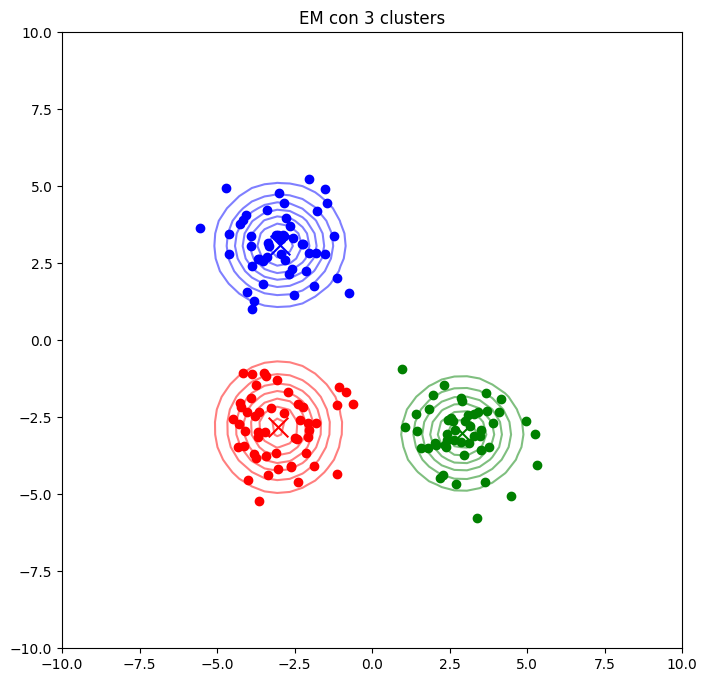

In [3]:
#Generar datos aleatorios con 3 clusters
np.random.seed(0)
X = np.vstack([
    np.random.randn(50, 2) + [-3, 3],
    np.random.randn(50, 2) + [-3, -3],
    np.random.randn(50, 2) + [3, -3]
])

# Ejecutar la función EM_GMM con 3 clusters y 100 iteraciones
EM_GMM(X, n_clusters=3, n_iterations=100)